#**Digit Recognizer**


##Importing Required Packages

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import sklearn

##Importing Data

In [ ]:
train = pd.read_csv("train.csv")
X = train.iloc[:,1:].values
y = train.iloc[:,0:1].values
print(X.shape,y.shape)

(42000, 784) (42000, 1)


##Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31500, 784) (10500, 784) (31500, 1) (10500, 1)


##Buliding a Deep Learning Model

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
247/247 [==============================] - 33s 133ms/step - loss: 0.2948 - accuracy: 0.9046
Epoch 2/10
247/247 [==============================] - 33s 133ms/step - loss: 0.1029 - accuracy: 0.9665
Epoch 3/10
247/247 [==============================] - 33s 133ms/step - loss: 0.0815 - accuracy: 0.9743
Epoch 4/10
247/247 [==============================] - 33s 132ms/step - loss: 0.0696 - accuracy: 0.9780
Epoch 5/10
247/247 [==============================] - 33s 132ms/step - loss: 0.0530 - accuracy: 0.9833
Epoch 6/10
247/247 [==============================] - 33s 132ms/step - loss: 0.0493 - accuracy: 0.9847
Epoch 7/10
247/247 [==============================] - 33s 133ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 8/10
247/247 [==============================] - 33s 133ms/step - loss: 0.0452 - accuracy: 0.9854
Epoch 9/10
247/247 [==============================] - 33s 132ms/step - loss: 0.0370 - accuracy: 0.9885
Epoch 10/10
247/247 [==============================] - 33s 132ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 4s 12ms/step - loss: 0.0395 - accuracy: 0.9881


[0.03949173912405968, 0.988095223903656]

## Model Evaluation and Testing

In [ ]:
test = pd.read_csv('test.csv')
test = test.values
test = test.reshape(test.shape[0], 28, 28, 1)
test = test / 255.0

y_pred = model.predict(test)
print(y_pred.shape)

(28000, 10)


## Saving the final results file for submission

In [ ]:
sample = pd.read_csv('sample_submission.csv')
final = []
for i in y_pred:
  final.append(np.argmax(i))
print(final[0:5])
print(final[-5:-1])
print(len(final))
print(sample.shape)
print(sample[-5:-1])

[2, 0, 9, 9, 3]
[9, 7, 3, 9]
28000
(28000, 2)
       ImageId  Label
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0


In [ ]:
Ids = np.arange(1,28001)
df = pd.DataFrame(data={'ImageId':Ids,"Label": final})
print(df.shape)
print(sample.shape)
df.to_csv("./digit_results.csv", sep=',',index=False)

(28000, 2)
(28000, 2)


## Using Real World Images

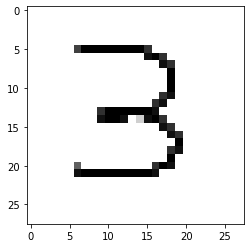

Above Image identified as:  3


In [55]:
import cv2
from keras.preprocessing import image

path = '/content/' + '3.png'
img = image.load_img(path, target_size=(28,28),color_mode='grayscale')
x = image.img_to_array(img)
x = x.reshape(1,28,28,1)
x/=255
classes = model.predict(x)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

# print(classes[0])
print('Above Image identified as: ',np.argmax(classes[0]))